<i>## Comments will be provided using this format. Key takeaway: groups are encouraged to change the formatting, but not the structure. Groups are also allowed to create additional notebooks - for instance, create one notebook for data exploration, and one notebook for each preprocessing-modelling-evaluation pipeline -, but must strive to keep an unified style across notebooks.</i>

#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Notebook Title`

#### Group:
- `Group member #1`
- `(...)`
- `Group member #5`

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Data Understanding](#P1)
- [2. General Data Preparation](#P2) 
- [3. Multilabel Classification (Information Requirement 3311)](#P3)
    - [3.1 Specific Data Preparation](#P31)
    - [3.2 Model Implementation](#P32)
    - [3.3 Model Evaluation](#P3n)
- [4. Sentiment Analysis (Information Requirement 3312)](#P4)
    - [4.1 Specific Data Preparation](#P41)
    - [4.2 Model Implementation](#P42)
    - [4.3 Model Evaluation](#P43)
- [...]
- [N. Additional Tasks (Information Requirements 332n)](#Pn)
    - [N.1 Specific Data Preparation](#Pn1)
    - [N.2 Model Implementation](#Pn2)
    - [N.3 Model Evaluation](#Pn3)

<i>## Note that the notebook structure differs from the report: instead of following the CRISP-DM phases and then specifying the different problems inside the phases, the notebook is structured by problem, with the CRISP-DM phases being defined for each specific problem.

In [70]:
## All imports must be concentrated on a cell that immediately follow the table of contents
%load_ext autoreload
%autoreload 2

import time
import pandas as pd
import numpy as np
from utils.pipeline_v1d import main_pipeline
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from wordcloud import WordCloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<font color='#BFD72F' size=5>1. Data Understanding</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

<i>## Use markdown cells to describe the purpose of the code cells that follow them.</i>

In [4]:
## Functions must be defined on separate cells
def text_mining_project_simulator():
    project_progress = 0
    while project_progress < 100:
        ## Comments on code cells can be used to highlight specific sections of yout code
        project_progress += 1
        print("working, albeit reluctantly, on a project that's {}% done \n\n".format(project_progress))
        time.sleep(5)

In [5]:
## Calls to functions (whether defined by the group, or imported from packages) must be separate from their definition

text_mining_project_simulator()

working, albeit reluctantly, on a project that's 1% done 


working, albeit reluctantly, on a project that's 2% done 




KeyboardInterrupt: 

In [2]:
reviews = pd.read_csv("data_hyderabad/10k_reviews.csv")
restaurants = pd.read_csv("data_hyderabad/105_restaurants.csv")

In [3]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [4]:
reviews.describe(include = "all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [6]:
reviews.dropna(subset=['Review'], inplace=True)
reviews[reviews["Review"].isna()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [7]:
reviews.drop(columns = ["Reviewer", "Time", "Pictures"], inplace= True)

In [8]:
restaurants

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [9]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
restaurants.describe(include="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [11]:
dicti = {}
for i in range(len(restaurants)):
    dicti[restaurants["Name"][i]] = restaurants["Cuisines"][i]

In [12]:
reviews["Cuisine"] = None
for i in reviews.index:
    reviews["Cuisine"][i] = dicti[reviews["Restaurant"][i]]

In [13]:
reviews

,Restaurant,Review,Rating,Metadata,Cuisine
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers","Chinese, Continental, Kebab, European, South I..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers","Chinese, Continental, Kebab, European, South I..."
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers","Chinese, Continental, Kebab, European, South I..."
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower","Chinese, Continental, Kebab, European, South I..."
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers","Chinese, Continental, Kebab, European, South I..."
...,...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers","Chinese, Seafood"
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers","Chinese, Seafood"
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers","Chinese, Seafood"
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers","Chinese, Seafood"


In [14]:
print(reviews["Review"].sample(12))

8265    dint like it...only the skin looked cooked..re...
6762    This is an Arabian themed Restaurant and is lo...
5303    Kalmi kebab and lemon coriander soup is an all...
2705    It's my birthday and had a great dinner with m...
2804    I never received this order 21812387 today. No...
4362    Located in such a place where numerous food co...
15      Food and ambience is fantastic.. Waiter Manav ...
5856                   Too sweet and artificial in taste.
5372    Visited this place for my team lunch, and the ...
5760                                                Great
2882    Very poor servicing. No communication from the...
6872    Hats Off to Tilt Republic Bar- The only Europe...
Name: Review, dtype: object


In [15]:
print(reviews["Cuisine"].sample(12))

8694                                       Cafe, Desserts
6532               North Indian, Chinese, Japanese, Sushi
3673    Biryani, South Indian, North Indian, Chinese, ...
7986          North Indian, Chinese, Continental, Biryani
6610              North Indian, Chinese, Mughlai, Biryani
4684                        Andhra, North Indian, Chinese
2172        North Indian, Japanese, Italian, Salad, Sushi
1079                 Street Food, North Indian, Fast Food
2101        North Indian, Japanese, Italian, Salad, Sushi
4174                          Bakery, Fast Food, Desserts
1565                                    Burger, Fast Food
9774                                         Asian, Sushi
Name: Cuisine, dtype: object


From the data exploration we concluded:
- There were missing values e some columns however, the only meaningful one was the `Review` and those were dropped, the other missing were kept
- We joined the cuisines from the `restaurants` to the `reviews` dataset so that we have the important information merged in only one dataset
- After taking samples of the `Review`, it is a string of words, numbers and emojis
- After taking samples of the `Cuisine`, it is a of types of cuisines seperated by comas

<font color='#BFD72F' size=5>2. Feature Extraction</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)


In [35]:
reviews["Review_feat_extraction"] = reviews["Review"].apply(lambda x: main_pipeline(x, print_output= False, tokenized_output=False, no_punctuation = False))

In [36]:
n = np.random.randint(0,9555)
print(reviews.iloc[n]["Review"])
print(reviews.iloc[n]["Review_feat_extraction"])

A place to fall in love with.. The decor and ambience is the eye catcher..
Variety of dishes with a good taste and price is worth to spend..
place fall love .. decor ambience eye catcher .. variety dish good taste price worth spend ..


In [37]:
def word_freq_calculator(td_matrix, word_list, df_output=True):
    word_counts = np.sum(td_matrix, axis=0).tolist()
    if df_output == False:
        word_counts_dict = dict(zip(word_list, word_counts))
        return word_counts_dict
    else:
        word_counts_df = pd.DataFrame({"words":word_list, "frequency":word_counts})
        word_counts_df = word_counts_df.sort_values(by=["frequency"], ascending=False)
        return word_counts_df

In [50]:
bow_vectorizer = CountVectorizer()
clean_bow_td_matrix = bow_vectorizer.fit_transform(reviews["Review_feat_extraction"]).toarray()
clean_bow_word_list = bow_vectorizer.get_feature_names_out().tolist()
clean_bow_words_freq = word_freq_calculator(clean_bow_td_matrix, clean_bow_word_list)
clean_bow_words_freq

,words,frequency
4929,good,7621
4456,food,6567
8651,place,6003
10166,service,3250
8027,order,3144
...,...,...
7828,nthis,1
7827,ntg,1
2935,crafty,1
2938,crampy,1


In [85]:
reviews["Clean_BOW"] = clean_bow_td_matrix.tolist()

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
9995    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9996    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9997    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9998    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9999    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: Clean_BOW, Length: 9955, dtype: object

In [59]:
def plot_term_frequency(df, nr_terms, df_name, show=True):
    
    # Create the Seaborn bar plot
    plt.figure(figsize=(10, 8))
    sns_plot = sns.barplot(x='frequency', y='words', data=df.head(nr_terms))  # Plotting top 20 terms for better visualization
    plt.title('Top 20 Term Frequencies of {}'.format(df_name))
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    if show:
        plt.show()

    fig = sns_plot.get_figure()

    return fig

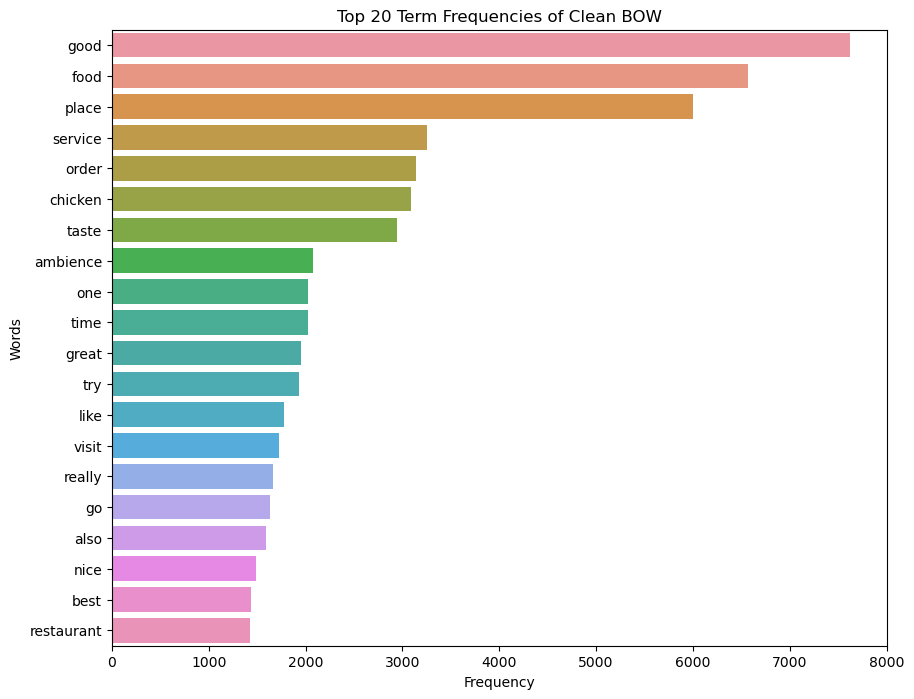

In [60]:
graph_clean_freq = plot_term_frequency(clean_bow_words_freq, 20, "Clean BOW", show = False)

In [91]:
def word_cloud_generator(folder_path,reviews):
    wc = WordCloud(background_color="white",max_words=120, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    tfidf_vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
    tfidf_td_matrix = tfidf_vectorizer.fit_transform(reviews["Review_feat_extraction"]).toarray()
    word_list = tfidf_vectorizer.get_feature_names_out().tolist()
    tfidf_df = pd.DataFrame({"words":word_list,"frequency":tfidf_vectorizer.idf_.tolist()})
    tfidf_df = tfidf_df.sort_values(by="frequency", ascending=True)

    ##TFIDF visualization
    tfidf_df = word_freq_calculator(tfidf_td_matrix,word_list, df_output=False)
    wc.generate_from_frequencies(tfidf_df)
    wc.to_file(os.path.join(folder_path, "WC_"+"TFIDF.png"))
    
    return tfidf_td_matrix.tolist()

In [94]:
reviews["Clean_TDIDF"] = word_cloud_generator("graphs",reviews)


In [95]:
reviews["Clean_TDIDF"]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
9995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Clean_TDIDF, Length: 9955, dtype: object